# Trabajo Final procesamiento de lenguaje natural (NLP) <a class="tocSkip">
## Universidad Pontificia Bolivariana <a class="tocSkip">

**Estudiante:** Karen Milena Mejía Sánchez

**ID:** 000581891



**Subir Este notebook de Trabajo Final en su repositorio de GitHub. y enviar el link en **Microsoft TEAMS**

Docente: [Jose R. Zapata](https://joserzapata.github.io)
- https://joserzapata.github.io
- https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/       


## Objetivo del Trabajo
Realizar un proceso de Procesamiento de lenguaje natural (NLP) para dejar los datos preparados para ser usados con algoritmos de Machine Learning para Clasificación como objetivo final del trabajo.

los datos preparados para ser usados con algoritmos de Machine Learning para Regresión o Clasificación como objetivo final del trabajo.

El trabajo se realizara en este jupyter notebook y subirlo a su repositorio de github creado en clase. (**Recuerde poner su nombre e información**)

## Las actividades a realizar
    

1) Limpiar los datos de texto.

   - https://joserzapata.github.io/courses/nlp/procesamiento-basico/

   - https://joserzapata.github.io/courses/nlp/preprocesamiento-texto/

2) Realizar la representación de texto:

   - https://joserzapata.github.io/courses/nlp/representaciones/

   - Tokenización
   - Lematización o stemming
   - Representación de los datos de texto (Bag of Words o TF-IDF)

3) Utilice un modelo de Machine Learning para clasificación para entrenar y evaluar el modelo.
        
    - Calcule estas las métricas de evaluación (accuracy, precision, recall, f1-score) - https://joserzapata.github.io/courses/python-ciencia-datos/clasificacion/#evaluacion-modelo-simple


    
   
    
*NOTA: No dude en contactarme para cualquier pregunta o inquietud :) por el chat de Teams o al correo
joser.zapata@upb.edu.co*

## EVALUACIÓN


|Porcentaje en la evaluación | Descripción| Nada | Incompleto | Completo 
| :---: |:---: |:---: |:---: |:---: 
| 5 % |**limpieza de los datos** |
| 5 % | **Representacion de los datos** |
| 5 % | **Machine Learning** <br> Entrenar y evaluar el modelo propuesto |


In [ ]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import re
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# Descargar recursos necesarios de NLTK
import nltk

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Carga del dataset

El archivo  se carga en aproximadamente 10 segundos

In [3]:
# Usar su ID UPB Ejemplo: "0028984798"
id_upb = "000581891"

data_reviews = pd.read_parquet(
    "https://www.dropbox.com/scl/fi/gvk9yj8cn96oocr9z058x/filmaffinity_reviews_dataset.parquet?rlkey=xgvr00zvkxbkwqqavqutpsshg&st=xjb7xze9&dl=1"
)
data_reviews = data_reviews.sample(n=50_000, random_state=int(id_upb))
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 126686 to 130449
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   author_review_desc  50000 non-null  string
 1   author_rating       50000 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 1.1 MB


Ejemplo de algunas filas del dataset

In [4]:
data_reviews.sample(5)

,author_review_desc,author_rating
104746,"\n¿5,9? ¿Solo un 5,9? Desde luego esta películ...",9
126133,"\nDensa película, con un guión muy elaborado (...",6
81080,\nQue los musicales no me apasionan es más que...,8
95448,"\nUna nueva versión de ""La Colmena"" de Cela ad...",6
130932,\nDurante más de dos años he tenido bloqueada ...,7


Evaluar los valores nulos

In [5]:
data_reviews.isnull().sum()

author_review_desc    0
author_rating         0
dtype: int64

En este caso no hay nulos.

Revisar si hay valores duplicados:

In [6]:
data_reviews.duplicated().sum()

np.int64(1)

No hay  valores duplicados.

## Clasificación Tradicional para Análisis de Sentimientos y Categorías 👍 👎



Definición: Se considera reseña positiva cuando la puntuación ("author_rating") es mayor que 6; negativa en caso contrario.

Crear la variable binaria de sentimiento: 1 (positivo) si author_rating > 6, 0 (negativo) de lo contrario

In [7]:
UMBRAL = 6
data_reviews["sentiment_bin"] = (data_reviews["author_rating"] > UMBRAL).astype(int)

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_data = data_reviews["author_review_desc"]
y_data = data_reviews["sentiment_bin"]


Dividir el dataset en entrenamiento y prueba

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data,
    y_data,
    test_size=0.2,
    stratify=y_data,  # Mantener la proporción de clases en ambos conjuntos
    random_state=42,
)

## Análisis exploratorio de los datos

para determinar que tipo de limpieza se debe realizar a los datos de texto de `X_train`

In [ ]:
# Aunque ya se sabe que se cargó una muestra de 50000 registros, verificar el tamaño del DataFrame
data_reviews.shape


(50000, 3)

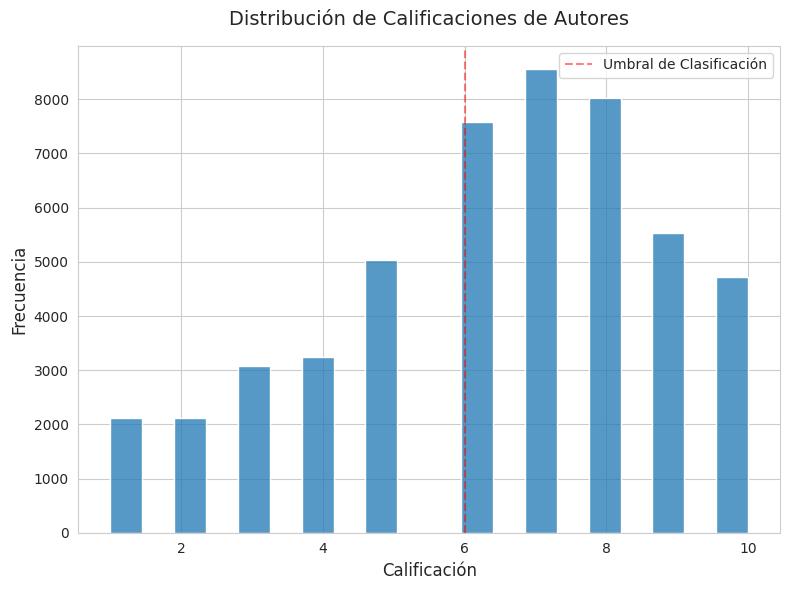

In [16]:
# Configurar el estilo de seaborn y tamaño de la figura
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Crear el gráfico de distribución
sns.histplot(data=data_reviews, x="author_rating", bins=20)

# Personalizar el gráfico
plt.title("Distribución de Calificaciones de Autores", fontsize=14, pad=15)
plt.xlabel("Calificación", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

# Añadir una línea vertical en el umbral de clasificación (6)
plt.axvline(
    x=6, color="red", linestyle="--", alpha=0.5, label="Umbral de Clasificación"
)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [17]:
# Exploración de X_train
X_train.shape

(40000,)

In [18]:
X_train.info()

<class 'pandas.core.series.Series'>
Index: 40000 entries, 73125 to 135712
Series name: author_review_desc
Non-Null Count  Dtype 
--------------  ----- 
40000 non-null  string
dtypes: string(1)
memory usage: 625.0 KB


In [20]:
X_train.head()

73125     \nUna cinta clásica en la que muestra una inte...
30304     \nPues es una comedia de lo más divertida. Muy...
68752     \nBuen producto para el lucimiento del vigoréx...
60101     \nEl recurso espacial de la calle sin salida, ...
113875    \nLa primera vez que la vi me decepcionó del t...
Name: author_review_desc, dtype: string

## 1) Limpieza de los datos de texto

Tomar los datos de `X_train` y aplicar las funciones de limpieza que considere necesarias

Ayudas:

- Convertir a minúsculas
- Eliminar caracteres especiales y números
- Corregir palabras mal escritas
- etc


In [ ]:
def limpiar_texto(texto):
    """
    Función para limpiar y preprocesar texto

    Pasos:
    1. Convertir a minúsculas
    2. Eliminar URLs
    3. Eliminar emails
    4. Normalizar caracteres unicode (acentos)
    5. Eliminar caracteres especiales y números
    6. Eliminar espacios múltiples
    7. Eliminar stopwords en español
    8. Aplicar stemming
    """
    if not isinstance(texto, str):
        return ""

    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar URLs
    texto = re.sub(r"https?://\S+|www\.\S+", "", texto)

    # Eliminar emails
    texto = re.sub(r"\S+@\S+", "", texto)

    # Normalizar caracteres (eliminar acentos)
    texto = (
        unicodedata.normalize("NFKD", texto).encode("ASCII", "ignore").decode("utf-8")
    )

    # Eliminar caracteres especiales y números
    texto = re.sub(r"[^a-zA-Z\s]", " ", texto)

    # Eliminar espacios múltiples
    texto = re.sub(r"\s+", " ", texto).strip()

    # Tokenización
    tokens = word_tokenize(texto)

    # Eliminar stopwords
    stop_words = set(stopwords.words("spanish"))
    tokens = [token for token in tokens if token not in stop_words]

    # Aplicar stemming
    stemmer = SnowballStemmer("spanish")
    tokens = [stemmer.stem(token) for token in tokens]

    # Unir tokens nuevamente en un texto
    texto_limpio = " ".join(tokens)

    return texto_limpio


In [38]:
# Aplicar la función de limpieza tanto a X_train como a X_test
print("Limpiando datos de entrenamiento...")
X_train_limpio = X_train.apply(limpiar_texto)

print("Limpiando datos de prueba...")
X_test_limpio = X_test.apply(limpiar_texto)

# Mostrar algunos ejemplos de antes y después de la limpieza
print("\nEjemplos de limpieza de texto con stemming en español:")
print("-" * 80)
print("\nDatos de entrenamiento:")
ejemplos_train = pd.DataFrame(
    {"Texto Original": X_train.head(), "Texto Limpio": X_train_limpio.head()}
)
print(ejemplos_train)

print("\nDatos de prueba:")
ejemplos_test = pd.DataFrame(
    {"Texto Original": X_test.head(), "Texto Limpio": X_test_limpio.head()}
)
print(ejemplos_test)


Limpiando datos de entrenamiento...
Limpiando datos de prueba...
Limpiando datos de prueba...

Ejemplos de limpieza de texto con stemming en español:
--------------------------------------------------------------------------------

Datos de entrenamiento:
                                           Texto Original  \
73125   \nUna cinta clásica en la que muestra una inte...   
30304   \nPues es una comedia de lo más divertida. Muy...   
68752   \nBuen producto para el lucimiento del vigoréx...   
60101   \nEl recurso espacial de la calle sin salida, ...   
113875  \nLa primera vez que la vi me decepcionó del t...   

                                             Texto Limpio  
73125   cint clasic muestr interes relacion dos joven ...  
30304   pues comedi mas divert allen tram sugest inter...  
68752   buen product lucimient vigorex mari cas adem d...  
60101   recurs espacial call sal direccion viv ray joh...  
113875  primer vez vi decepcion pareci inexplic gan cu...  

Datos de prueba:

## 2) Representacion del texto

Luego de tener los datos limpios, realizar la representación de los datos de texto para poder usarse en modelos de machine learning.

In [ ]:
# Importar TfidfVectorizer para la representación de texto
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador TF-IDF
# max_features=10000 limita el vocabulario a las 10000 palabras más frecuentes
# min_df=5 ignora términos que aparecen en menos de 5 documentos
vectorizer = TfidfVectorizer(max_features=10000, min_df=5)

# Ajustar el vectorizador y transformar los datos de entrenamiento
print("Transformando datos de entrenamiento...")
X_train_tfidf = vectorizer.fit_transform(X_train_limpio)

# Transformar los datos de prueba
print("Transformando datos de prueba...")
X_test_tfidf = vectorizer.transform(X_test_limpio)

# Mostrar información sobre la representación
print("\nInformación de la representación TF-IDF:")
print(f"Número de documentos de entrenamiento: {X_train_tfidf.shape[0]}")
print(f"Número de características (términos): {X_train_tfidf.shape[1]}")
print(
    f"Densidad de la matriz: {X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1]):.4f}"
)

Transformando datos de entrenamiento...
Transformando datos de prueba...
Transformando datos de prueba...

Información de la representación TF-IDF:
Número de documentos de entrenamiento: 40000
Número de características (términos): 10000
Densidad de la matriz: 0.0093

Información de la representación TF-IDF:
Número de documentos de entrenamiento: 40000
Número de características (términos): 10000
Densidad de la matriz: 0.0093


In [40]:
# Mostrar las palabras más frecuentes y sus índices en el vocabulario
vocab_dict = vectorizer.vocabulary_
sorted_vocab = sorted(vocab_dict.items(), key=lambda x: x[1])

print("Primeras 20 palabras del vocabulario:")
for word, idx in sorted_vocab[:20]:
    print(f"{word}: {idx}")

# Obtener algunas estadísticas de las características
from scipy import sparse
import numpy as np

# Calcular la frecuencia promedio de cada término
term_frequencies = np.asarray(X_train_tfidf.sum(axis=0)).flatten()
print("\nEstadísticas de frecuencia de términos:")
print(f"Frecuencia promedio: {term_frequencies.mean():.4f}")
print(f"Frecuencia máxima: {term_frequencies.max():.4f}")
print(f"Frecuencia mínima: {term_frequencies.min():.4f}")

Primeras 20 palabras del vocabulario:
aaron: 0
abadi: 1
abaj: 2
aban: 3
abander: 4
abandon: 5
abarc: 6
abarrot: 7
abat: 8
abba: 9
abej: 10
abel: 11
aberr: 12
abiert: 13
abigail: 14
abism: 15
abismal: 16
abneg: 17
aboc: 18
abog: 19

Estadísticas de frecuencia de términos:
Frecuencia promedio: 32.6950
Frecuencia máxima: 2108.0353
Frecuencia mínima: 2.1196


## 3) Entrenar un modelo de machine learning de clasificación

Utilizar un modelo de clasificación para entrenar y evaluar el modelo con los datos preparados.


In [ ]:
# Importar las bibliotecas necesarias
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score

# Crear y entrenar el modelo
print("Entrenando el modelo...")
# Usamos CalibratedClassifierCV para obtener probabilidades
base_model = LinearSVC(random_state=42, max_iter=1000)
model = CalibratedClassifierCV(base_model, cv=5)

# Realizar validación cruzada
print("\nRealizando validación cruzada...")
cv_scores = cross_val_score(
    base_model, X_train_tfidf, y_train, cv=5, scoring="accuracy"
)
print(
    f"Precisión en validación cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})"
)

# Entrenar el modelo final con todos los datos de entrenamiento
print("\nEntrenando modelo final...")
model.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train_tfidf)
print("\nRendimiento en datos de entrenamiento:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred):.4f}")

Entrenando el modelo...

Realizando validación cruzada...
Precisión en validación cruzada: 0.7795 (+/- 0.0098)

Entrenando modelo final...
Precisión en validación cruzada: 0.7795 (+/- 0.0098)

Entrenando modelo final...

Rendimiento en datos de entrenamiento:
Accuracy: 0.8800
F1-Score: 0.8903

Rendimiento en datos de entrenamiento:
Accuracy: 0.8800
F1-Score: 0.8903


### Evaluar el modelo con los datos de prueba

Usar el modelo para predecir en `X_test` y evaluar con `y_test`

**Nota:** Recuerde que `X_test` debe pasar por los mismos procesos de limpieza y representación que `X_train`

In [45]:
# Realizar predicciones en el conjunto de prueba
print("Realizando predicciones en datos de prueba...")
y_pred = model.predict(X_test_tfidf)

# Calcular probabilidades de predicción
y_pred_proba = model.predict_proba(X_test_tfidf)

# Evaluar el rendimiento
print("\nMétricas de evaluación en datos de prueba:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba[:, 1]):.4f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Realizando predicciones en datos de prueba...

Métricas de evaluación en datos de prueba:
Accuracy: 0.7930
Precision: 0.7925
Recall: 0.8321
F1-Score: 0.8119
ROC AUC Score: 0.8737

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      4633
           1       0.79      0.83      0.81      5367

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



**Guardar el modelo**

In [ ]:
# Importar joblib si no está importado
import joblib

# Crear el directorio models si no existe
import os

if not os.path.exists("../models"):
    os.makedirs("../models")

# Guardar el modelo y el vectorizador
print("Guardando el modelo y el vectorizador...")
joblib.dump(model, "../models/sentiment_model.pkl")
joblib.dump(vectorizer, "../models/tfidf_vectorizer.pkl")
print("Modelo y vectorizador guardados exitosamente en la carpeta 'models'.")

Guardando el modelo y el vectorizador...
Modelo y vectorizador guardados exitosamente en la carpeta 'models'.
Modelo y vectorizador guardados exitosamente en la carpeta 'models'.


## Librerías Usadas

In [50]:
from watermark import watermark

print(watermark(python=True, iversions=True, globals_=globals()))

Python implementation: CPython
Python version       : 3.12.11
IPython version      : 9.6.0

pandas    : 2.3.3
nltk      : 3.9.2
scipy     : 1.16.3
seaborn   : 0.13.2
matplotlib: 3.10.7
sklearn   : 1.7.2
watermark : 2.5.0
re        : 2.2.1
joblib    : 1.5.2
numpy     : 2.3.4



---

## Referencias
- [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- [Classification of text documents using sparse features](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html)
- Ejemplo de Entrenamiento y selección de Modelo de machine learning entre varios modelos <https://joserzapata.github.io/post/ciencia-datos-proyecto-python/6-model_selection/>
- https://joserzapata.github.io/courses/python-ciencia-datos/python/
- https://joserzapata.github.io/courses/python-ciencia-datos/pandas/
- https://joserzapata.github.io/courses/python-ciencia-datos/machine-learning/

Docente: [Jose R. Zapata](https://joserzapata.github.io)

- [https://joserzapata.github.io/](https://joserzapata.github.io/)
- [https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/](https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/)